In [ ]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import pickle # permet de generer le modele
#package manquantes pip install nom du package

In [ ]:
df= pd.read_csv('/content/course+-+Quiz+P2.csv')

In [ ]:
df

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0
4,5,M,00:33:29,76,779609,26.0
...,...,...,...,...,...,...
335,336,F,01:08:34,27,781714,41.0
336,337,F,01:08:36,27,781716,48.0
337,338,M,01:09:31,27,781771,24.0
338,339,F,01:09:31,27,781771,25.0


In [ ]:
df.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,0,76,779543,40.0
1,2,M,1,27,779560,34.0
2,3,M,2,76,779595,44.0
3,4,M,3,76,779603,46.0
4,5,M,4,76,779609,26.0


In [ ]:
df.tail()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
335,336,F,295,27,781714,41.0
336,337,F,296,27,781716,48.0
337,338,M,297,27,781771,24.0
338,339,F,297,27,781771,25.0
339,340,F,298,76,781831,41.0


In [ ]:
df.shape

(340, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        340 non-null    int64  
 1   Sexe            338 non-null    object 
 2   Temps           340 non-null    object 
 3   Dept            340 non-null    int64  
 4   Temps_secondes  340 non-null    int64  
 5   Age             336 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 16.1+ KB


In [ ]:
df.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0
4,5,M,00:33:29,76,779609,26.0


In [ ]:
print(df['Position'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Position, dtype: bool


In [ ]:
print(df['Sexe'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Sexe, dtype: bool


In [ ]:
print(df['Temps'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Temps, dtype: bool


In [ ]:
df['Dept'].head().isnull()

0    False
1    False
2    False
3    False
4    False
Name: Dept, dtype: bool

In [ ]:
print(df['Temps_secondes'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Temps_secondes, dtype: bool


In [ ]:
print(df['Age'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool


In [ ]:
df.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64

#Question 1
Sachant que l'ensemble des coureurs proviennent soit de la Seine-Maritime (76), soit de l'Eure (27) ou soit du Calvados (14), quel département n'appartenant pas à cette liste apparaît pourtant dans notre jeu de données ?

In [ ]:
#Le departement 78 n'appartiennent pas à cette liste

In [ ]:
#On peut très facilement avoir la liste des départements, via par exemple une méthode .value_counts, ou une méthode .unique :

df['Dept'].value_counts()
# ou
#data['Dept'].unique()
#Et se rendre compte que 5 personnes sont anormalement issues du département 78.

76    209
27    103
14     23
78      5
Name: Dept, dtype: int64

#Question 2
Notre jeu de données contient plusieurs valeurs manquantes. Déterminez combien exactement et combien de variables sont concernées :

In [ ]:
df.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64

On peut avoir la réponse très facilement en lançant la ligne de code qui a été donnée dans le cours :
On a  valeurs manquantes 2 pour la variable Sexe et 4 pour la variable age

In [ ]:
#df.isnull().sum()
#On trouve ainsi 6 valeurs manquantes en tout, réparties sur 2 variables (Sexe et Age).

#Question 3
Essayez de convertir la variable Temps dans un format adapté (datetime, par exemple). Vous obtiendrez normalement une valeur manquante, après transformation. À quoi est due cette valeur manquante ?

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Temps']=encoder.fit_transform(df["Temps"])
df

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,0,76,779543,40.0
1,2,M,1,27,779560,34.0
2,3,M,2,76,779595,44.0
3,4,M,3,76,779603,46.0
4,5,M,4,76,779609,26.0
...,...,...,...,...,...,...
335,336,F,295,27,781714,41.0
336,337,F,296,27,781716,48.0
337,338,M,297,27,781771,24.0
338,339,F,297,27,781771,25.0


Pour se rendre compte de cela, on peut par exemple essayer de convertir la variable Temps dans une autre variable (ici notée Temps_format) et afficher la ligne contenant une valeur manquante

In [ ]:
df['Temps_format'] = pd.to_datetime(df['Temps'], errors="coerce")
df.loc[df['Temps_format'].isnull(),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,Temps_format
250,251,M,54min47s,27,780887,42.0,NaT


On se rend compte qu'il est écrit 54min47s dans Temps, au lieu du format initialement attendu. C'est donc une erreur d'irrégularité !

#Question 4
En regardant les variables quantitatives (Position, Age et Temps_secondes), combien d'outliers se trouvent dans notre jeu de données au total ?

<Axes: >

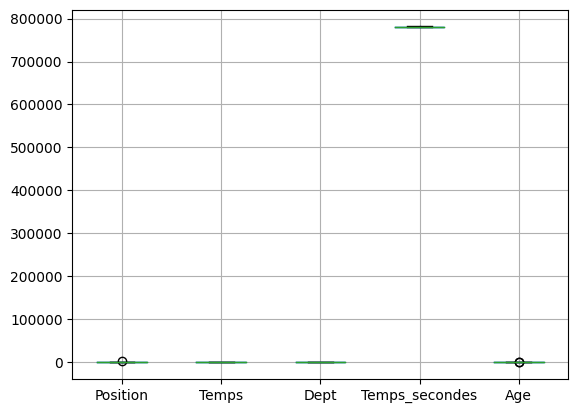

In [ ]:
import seaborn as sns
df.boxplot()

<Axes: >

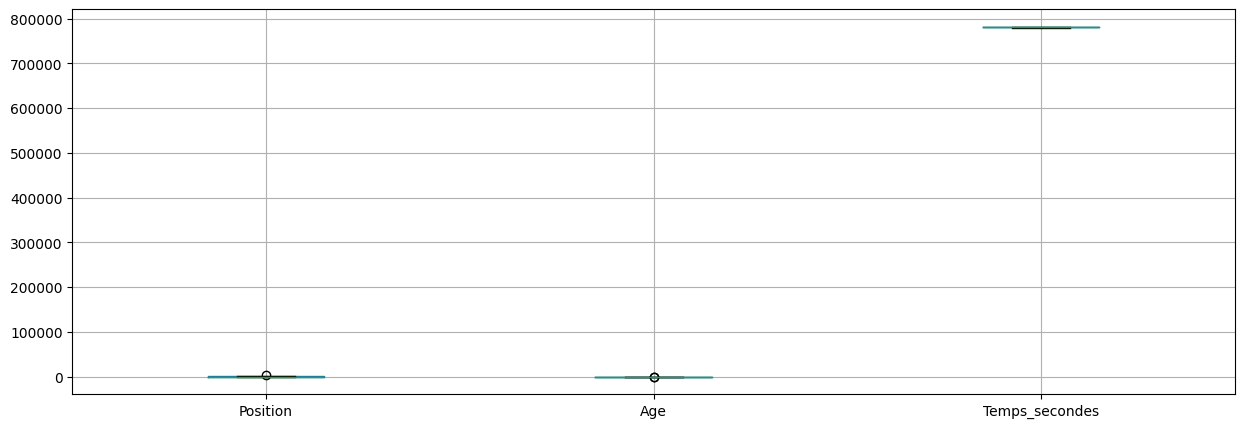

In [ ]:
df[['Position','Age', 'Temps_secondes']].boxplot(figsize=(15,5))

<Axes: xlabel='Position'>

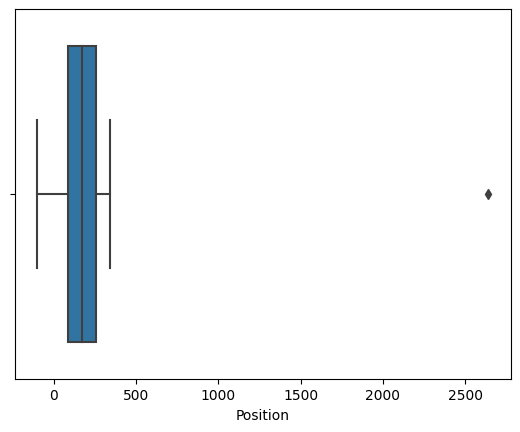

In [ ]:
import seaborn as sb
sb.boxplot(x = 'Position', data = df)

In [ ]:
import seaborn as sb

<Axes: xlabel='Age'>

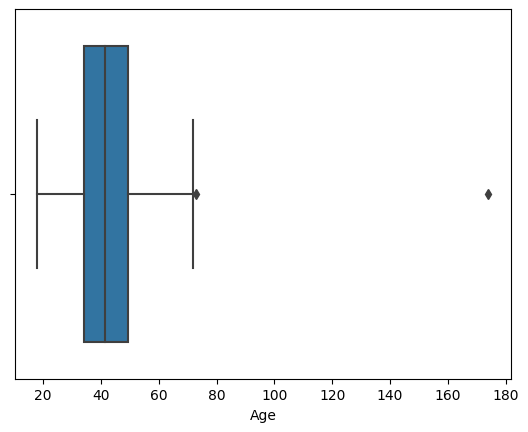

In [ ]:
sb.boxplot(x = 'Age', data = df)

<Axes: xlabel='Temps_secondes'>

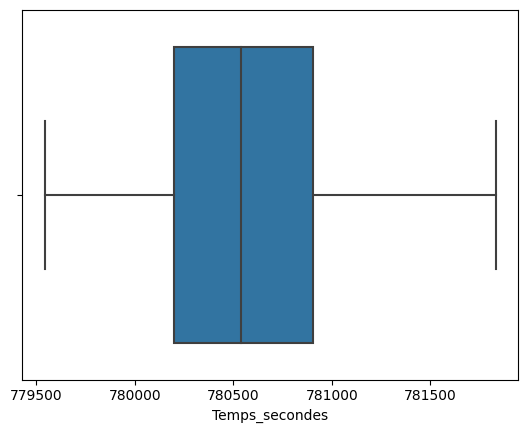

In [ ]:
sb.boxplot(x = 'Temps_secondes', data = df)

In [ ]:
df.describe()

,Position,Dept,Temps_secondes,Age
count,340.000000,340.000000,340.000000,336.000000
mean,177.061765,56.991176,780553.123529,42.145833
std,166.584054,25.059279,514.526264,13.963690
min,-100.000000,14.000000,779543.000000,18.000000
25%,85.750000,27.000000,780200.500000,34.000000
50%,170.500000,76.000000,780536.500000,41.500000
75%,255.250000,76.000000,780906.500000,49.250000
max,2640.000000,78.000000,781831.000000,174.000000


In [ ]:
for var in ["Position", "Temps_secondes", "Age"]:
    print('Pour la variable ', var)
    print('Maximum : ', df[var].max())
    print('Minimum : ', df[var].min())

Pour la variable  Position
Maximum :  2640
Minimum :  -100
Pour la variable  Temps_secondes
Maximum :  781831
Minimum :  779543
Pour la variable  Age
Maximum :  174.0
Minimum :  18.0


La réponse est en effet 3 ! Si on regarde rapidement, en utilisant un .describe() :

Conclusion: Nous avons trois outliers 1 pour la position et 2 pour l'age

on se rend facilement compte qu'il y a au moins deux valeurs anormales pour la Position (2640 et -100), et une pour l'Age (174). En poussant l'analyse plus loin, on se rend compte qu'il n'y en a pas plus.

#Question 5
Notre jeu de données possède-t-il des doublons, soit des personnes ayant la même position et le même temps à l'arrivée, avec les mêmes caractéristiques ?

In [ ]:
df.loc[df['Temps'].duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
28,29,M,28,76,779827,31.0
29,30,M,28,76,779827,25.0
57,58,M,56,76,780041,65.0
58,59,M,56,27,780041,42.0
62,63,M,60,76,780073,53.0
...,...,...,...,...,...,...
328,329,F,290,27,781567,20.0
329,330,F,290,27,781567,28.0
330,331,F,290,27,781567,29.0
337,338,M,297,27,781771,24.0


In [ ]:
df.loc[df['Temps_secondes'].duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age
28,29,M,28,76,779827,31.0
29,30,M,28,76,779827,25.0
57,58,M,56,76,780041,65.0
58,59,M,56,27,780041,42.0
62,63,M,60,76,780073,53.0
...,...,...,...,...,...,...
328,329,F,290,27,781567,20.0
329,330,F,290,27,781567,28.0
330,331,F,290,27,781567,29.0
337,338,M,297,27,781771,24.0


In [ ]:
#Une recherche rapide de doublons nous montre qu'aucune ligne n'est concernée :

df.loc[df.duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,Temps_format


#Question6
Après avoir vérifié tout cela, il reste encore une erreur dans notre jeu de données. Quelle est-elle ?

In [ ]:
#L'erreur aurait pu être détectée assez rapidement via un .describe()
#en ne considérant que les variables qualitatives :

df.describe(include=['O'])

,Sexe,Temps
count,338,340
unique,3,300
top,M,00:50:07
freq,244,3


En regardant les différentes informations, on se rend compte que la variable Sexe a 3 modalités ; en creusant un peu, on peut en effet bien apercevoir qu'il y a une modalité 'O' qui ne représente rien : c'est une erreur lexicale.

Pour les valeurs manquantes, via la commande adéquate ( data.isnull().sum()  ) : la variable Temps_secondes n'est pas concernée.

Une recherche rapide de doublons nous montre qu'aucune ligne n'est concernée :



In [ ]:
df.loc[df.duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,Temps_format


Et enfin, en regardant les différentes valeurs prises par la variable Dept (  data['Dept'].unique()  
par exemple), on peut noter qu'il n'y a pas d'erreur de formatage.

#Question 7
Ces deux morceaux de code effectuent la même opération. L'un est écrit en Python, l'autre en R. Que font-ils ?

In [ ]:
import pandas as pd

STATUS_VALUES = ["INVITE","COLLABORATEUR","EMPLOYE"]
df = pd.read_csv("mapetiteentreprise.csv")

def process(value):
    if value not in STATUS_VALUES:
        return "INVITE"
    else:
        return value

df["status"] = df["status"].map(process)

Ils attribuent la valeur "INVITE" pour les individus dont la valeur de la variable status n'est ni "EMPLOYE", ni "COLLABORATEUR".



#Question 8
Quelle colonne de ce tableau contient une erreur d'irrégularité ?

La colonne score contient des résultats dans des unités différentes (points et %) : c'est une erreur d'irrégularité. La réponse "999 ans" dans la colonne âge, quant à elle, est une erreur aberrante.

#PARTIEII

In [ ]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re

# chargement et affichage des données
data = pd.read_csv('/content/personnes.csv')
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5             24  3.45m  
6          Bénin  1.45m  


In [ ]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [ ]:
data.shape

(7, 5)

De façon générale, on évitera d'utiliser la fonction  print()  sur un dataframe. Ici, n'ayant que 7 lignes, cela n'est pas du tout problématique. Mais avec des fichiers de plusieurs milliers, voire millions de lignes, vous admettrez que regarder l'ensemble des lignes n'est pas très pertinent. On préférera dans ce cas utiliser les méthodes  .head()  ou  .tail()  des dataframes qui permettent de voir les 5 premières ou dernières lignes d'un dataframe.

#Détectez les erreurs

Certaines erreurs sont indéniablement plus faciles à détecter que d'autres. Par exemple, les valeurs manquantes sont assez faciles à détecter ! Il existe une méthode  .isnull()  qui peut s'appliquer aux dataframes ou aux Series  pour vérifier si une valeur est une valeur manquante ou non. Voilà une ligne permettant de comptabiliser le nombre de valeurs manquantes par variable :

print(data.isnull().sum())

In [ ]:
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


Pour les valeurs extrêmes, des méthodes comme celles de l'écart interquartile ou du Z-score permettent assez facilement de mettre en valeur des outliers.

Pour les doublons, l'utilisation de la méthode  .duplicated()  permet de vérifier si au sein d'une ou plusieurs variables, il existe des doublons. Cette méthode retournera  True  dans ce cas, et  False  sinon. Voilà un exemple avec l'e-mail, qui affichera l'ensemble des lignes concernées par un doublon sur la variable e-mail :

In [ ]:
data.loc[data['email'].duplicated(keep=False),:]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
6,samuël,samuel_329@example.com,NaT,Bénin,1.45


Pour le reste des erreurs, il n'y a malheureusement pas de solution magique. Il faudra généralement créer des fonctions spécifiques pour identifier les différentes erreurs. Par exemple, pour une erreur de formatage, on peut fixer un format et cibler l'ensemble des valeurs qui ne rentrent pas dans ce format.

Maintenant que nous avons tous les outils en main pour détecter les erreurs, il est temps de les traiter !

#Traitez les erreurs
Souvenez-vous, nous avions déterminé plusieurs erreurs : sur les pays, sur les e-mails, sur les tailles et sur la date de naissance ! Nous allons donc parcourir chacune des colonnes pour détecter les erreurs, les corriger, puis actualiser les colonnes en conséquence. Que ce soit en Python ou en R, actualiser une colonne d'un dataframe se fait de cette manière :

In [ ]:
#data['nom_colonne'] = nouvelle_colonne

Ici, on cherche à remplacer les valeurs de la colonne (ou variable)  nom_colonne. Si le dataframe a 7 lignes, alors la colonne  nom_colonne  contient 7 valeurs. Pour les remplacer,  nouvelle_colonne  doit ainsi être une liste de 7 valeurs.

Il se peut qu'à certains moments, on ne souhaite pas modifier l'entièreté de la colonne mais seulement une partie, comme l'ensemble des valeurs satisfaisant une certaine condition. Pour cela, le plus simple reste de stocker la condition dans un mask, qui pourra ensuite être utilisé :

In [ ]:
#mask = # condition à vérifier pour cibler spécifiquement certaines lignes
#data.loc[mask, 'ma_colonne'] = nouvelles_valeurs

Dans l'exemple ci-dessus, on a stocké une condition dans la variable  mask(comme par exemple :  data['email'].duplicated(keep=False)  pour reprendre l'exemple ci-dessus). ma_colonne  correspond forcément à une colonne existante, et seules les lignes satisfaisant la condition stockée dans mask au sein de cette colonne verront leurs valeurs modifiées. Naturellement et comme précédemment, si votre condition ne concerne que 4 valeurs, il faudra également que  nouvelles_valeurs  soit une liste de 4 valeurs.

Cette dernière approche peut sembler un peu déroutante à première vue, mais vous verrez qu'avec un peu de pratique, cela deviendra vite un outil indispensable lors de vos analyses de données.

#Traitez les pays
Pour les pays, nous avions un problème majeur qui était la valeur 24
 , à la 5e ligne. La première approche pourrait être de considérer que l'ensemble de mes pays doivent être des chaînes de caractères, et donc que toutes les valeurs numériques doivent être remplacées par des valeurs manquantes. Mais pour faire la chose encore plus "proprement", on pourrait définir une liste de pays valides, et remplacer toutes les valeurs qui ne concordent pas avec la liste par des valeurs manquantes :


In [ ]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne'
                  , 'USA']
mask = ~data['pays'].isin(VALID_COUNTRIES)
data.loc[mask, 'pays'] = np.NaN

Ici, ma condition utilisant  .isin()  renvoie True si la valeur est dans la liste passée en paramètre (donc ici  VALID_COUNTRIES  ), False sinon : ainsi, le  .loc()  permet de ne sélectionner que les lignes dont le pays est dans la liste définie.

Tout à fait ! Et tout se joue dans le petit symbole  ~  placé en amont de la condition. Ce dernier permet de prendre l'exact inverse de la condition, donc ici, l'ensemble des lignes dont le pays n'est pas dans la liste définie. On remplace ensuite l'ensemble des valeurs de pays de ces lignes par np.NaN  , qui est la valeur utilisée par les librairies  Numpy  et  Pandas  pour spécifier qu'une valeur est inconnue. C'est en quelque sorte un équivalent de  None  .

Plus précisément, "NaN" signifie "Not a Number" ("pas un nombre", en français). Vous rencontrerez également pd.NaT  , "not a time" (pour les colonnes de dates).

Traitez les e-mails
Au tour des e-mails, maintenant ! Le problème avec cette colonne, c'est qu'il y a parfois 2 adresses e-mail par ligne. Nous ne souhaitons prendre que la première. Nous pouvons là aussi utiliser les outils fournis par Pandas pour faire cela :

In [ ]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]

Lorsqu'il y a plusieurs e-mails par ligne, ceux-ci sont séparés par des virgules. Nous séparons donc la chaîne de caractères de la variable e-mail, selon les virgules grâce à la méthode split. Il y a cependant quelques arguments que nous allons ici expliciter :

','  correspond au caractère qui va nous permettre de séparer notre chaîne de caractères.

n=1  correspond au nombre de fois où notre chaîne de caractères va être séparée. Ici nous le fixons à une fois, car nous ne souhaitons conserver qu'un seul e-mail : le premier rencontré. Le reste n'est finalement que peu intéressant.

expand=True  permet de placer les différentes séparations en plusieurs colonnes.

Nous sélectionnons ensuite la première colonne, correspondant au premier e-mail rencontré.

Si vous avez été attentif, vous aurez sûrement noté le  .str  situé juste avant la méthode split. Cette dernière est nativement une méthode spécifique aux chaînes de caractères (string, en anglais) ! Afin de pouvoir l'utiliser sur l'ensemble des lignes de notre dataframe, nous spécifions donc qu'il s'agit d'une méthode de string, via ce  .str  .

Vous trouverez des choses similaires si vous souhaitez accéder aux méthodes de datetime, via le .dt  .

Traitez les tailles
Nous aurons besoin d'effectuer deux opérations :

Convertir les tailles en nombres décimaux. Nous en profiterons pour remplacer l'ensemble des tailles non conformes par des valeurs manquantes.

Remplacer les valeurs manquantes par la moyenne de notre échantillon.

Pour la première étape, comme l'ensemble de nos valeurs sont censées avoir pour format X.XXm (avec X correspondant à un chiffre), on peut par exemple supprimer le dernier caractère de la colonne et convertir l'ensemble de la colonne en numérique. Ce faisant, les valeurs non valides seront automatiquement remplacées par des valeurs manquantes, via l'argument  errors  que nous spécifions :

In [ ]:
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')

L'argument errors permet de définir comment Python doit réagir lorsqu'il n'arrive pas à correctement convertir, ce qui correspond aux erreurs dans notre colonne. Il existe différentes options, mais  'coerce'   permet de remplacer l'ensemble des erreurs par des valeurs manquantes.

Ensuite, il faut à présent remplacer les valeurs manquantes par la moyenne de la variable. Cette simple ligne permettra de faire cela :

In [ ]:
data.loc[data['taille'].isnull(), 'taille'] = data['taille'].mean()

In [ ]:
data1=data['taille'].mean()
data1

1.8416666666666668

Traitez les dates
Dernier sujet à traiter, et pas des moindres : les dates ! Ici, nous allons simplement spécifier un certain format de date, et transformer notre variable dans un type adéquat :


In [ ]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'],
                                           format='%d/%m/%Y', errors='coerce')

In [ ]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,NaN
3,Marc,"marco23@example.com, mc23@supermail.eu",1978-02-10,France,1.65
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,3.45
6,samuël,samuel_329@example.com,NaT,Bénin,1.45


Le type datetime est un format très complexe, et nous n'aurons malheureusement pas le temps de l'aborder dans le cadre de ce cours. Mais pour expliquer rapidement le format, le "code bizarre" situé derrière correspond à :

%d : le jour codé sur deux chiffres (01 à 31) ;

%m : le mois codé sur deux chiffres (01 à 12) ;

%Y : l'année codée sur 4 chiffres.

##

En résumé
Chaque erreur nécessite un traitement adéquat. Pour faire cela, Pandas met à disposition de nombreuses méthodes et fonctions très pratiques et performantes !

Même si certaines erreurs sont faciles à détecter et à traiter, d'autres nécessiteront un peu plus de code, et de connaître les outils correspondants.